170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/10
1563/1563 [==============================] - 13s 6ms/step - loss: 1.5290 - accuracy: 0.4441 - val_loss: 1.2432 - val_accuracy: 0.5564
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1905 - accuracy: 0.5743 - val_loss: 1.1448 - val_accuracy: 0.5924
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0402 - accuracy: 0.6334 - val_loss: 1.0315 - val_accuracy: 0.6395
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9363 - accuracy: 0.6702 - val_loss: 0.9780 - val_accuracy: 0.6601
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8645 - accuracy: 0.6981 - val_loss: 0.9298 - val_accuracy: 0.6765
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8114 - accuracy: 0.7146 - val_loss: 0.8820 - val_accuracy: 0.6956
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step 

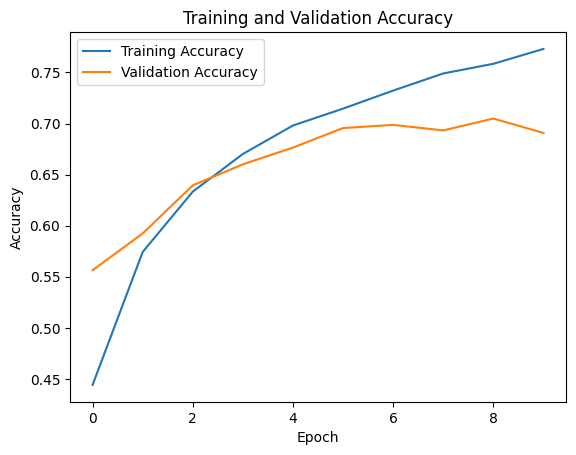

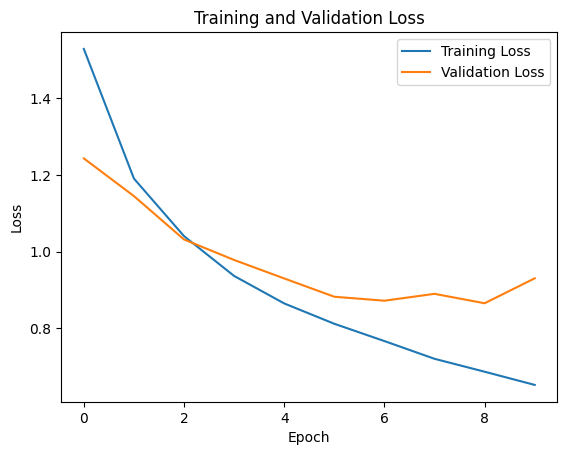

1/1 [==============================] - 0s 312ms/step


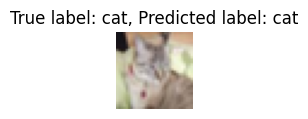

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
input_image = test_images[8]
input_label = test_labels[8]

predictions = model.predict(np.expand_dims(input_image, axis=0))
predicted_label = np.argmax(predictions)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(1, 1))
plt.imshow(input_image)
plt.title(f"True label: {class_names[input_label[0]]}, Predicted label: {class_names[predicted_label]}")
plt.axis('off')
plt.show()